<a href="https://colab.research.google.com/github/AmnaNazir20/house-price-prediction/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Load Dataset**

In [54]:
from google.colab import files

uploaded = files.upload()

Saving housing.csv to housing (1).csv


In [55]:
import numpy as np
import pandas as pd

In [56]:
df=pd.read_csv("/content/housing.csv")

# **2.Exploratory Data Analysis (EDA)**

In [57]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [58]:
df.shape

(20640, 10)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [60]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [61]:
print(df['total_bedrooms'].skew())


3.459546331523342


In [62]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(),inplace=True)

/tmp/ipython-input-62-2576143001.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(),inplace=True)


In [63]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [64]:
df=pd.get_dummies(df)

In [65]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [66]:
df.duplicated().sum()

np.int64(0)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

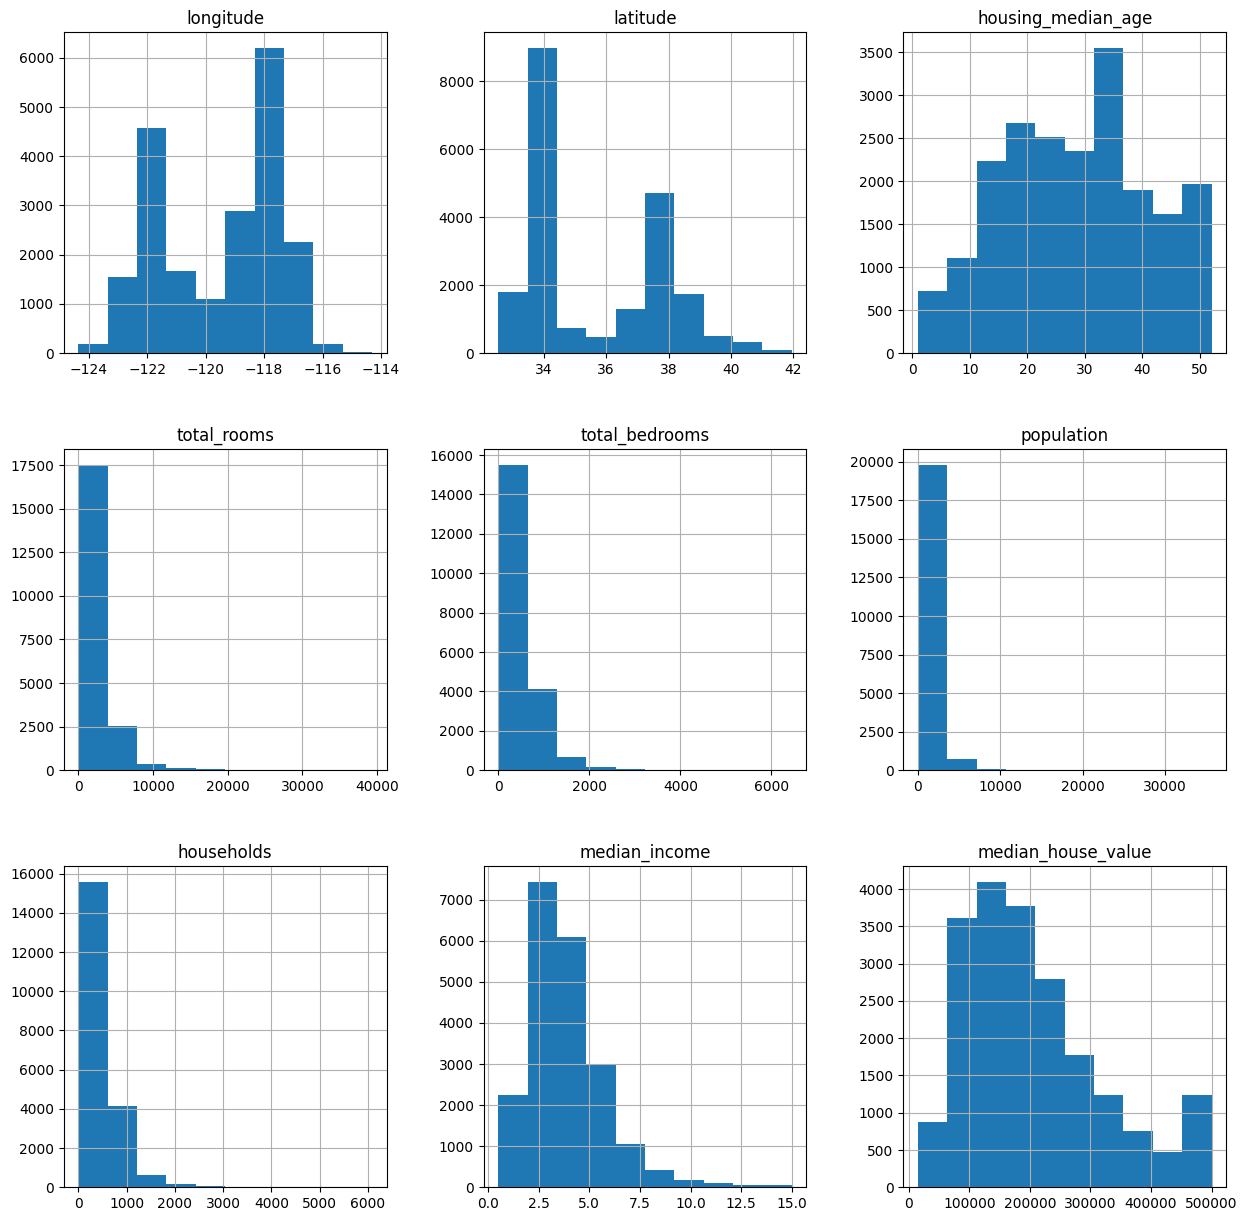

In [67]:
df.hist(figsize=(15, 15))


In [68]:
df['total_rooms_log'] = np.log1p(df['total_rooms'])
df['total_bedrooms_log'] = np.log1p(df['total_bedrooms'])
df['population_log'] = np.log1p(df['population'])
df['households_log'] = np.log1p(df['households'])

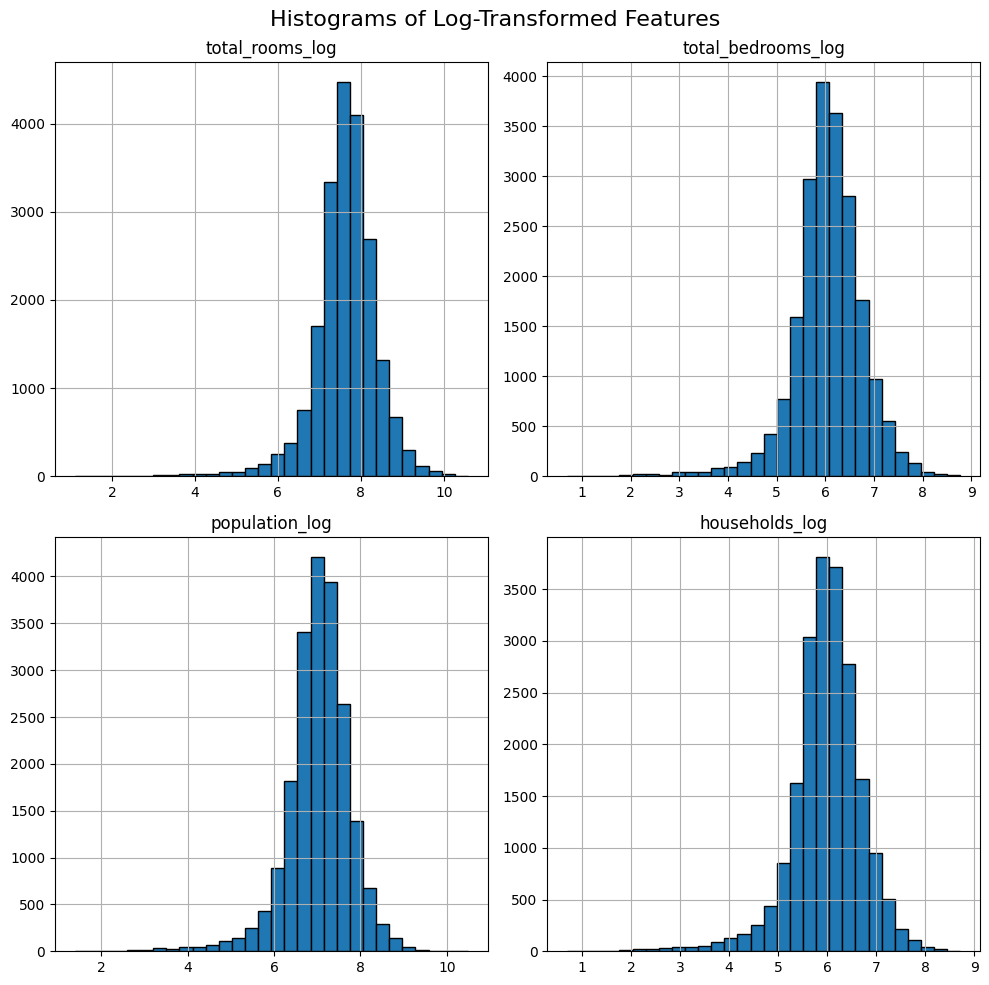

In [69]:
import matplotlib.pyplot as plt

log_cols = ['total_rooms_log', 'total_bedrooms_log', 'population_log', 'households_log']

df[log_cols].hist(figsize=(10, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of Log-Transformed Features', fontsize=16)
plt.tight_layout()
plt.show()


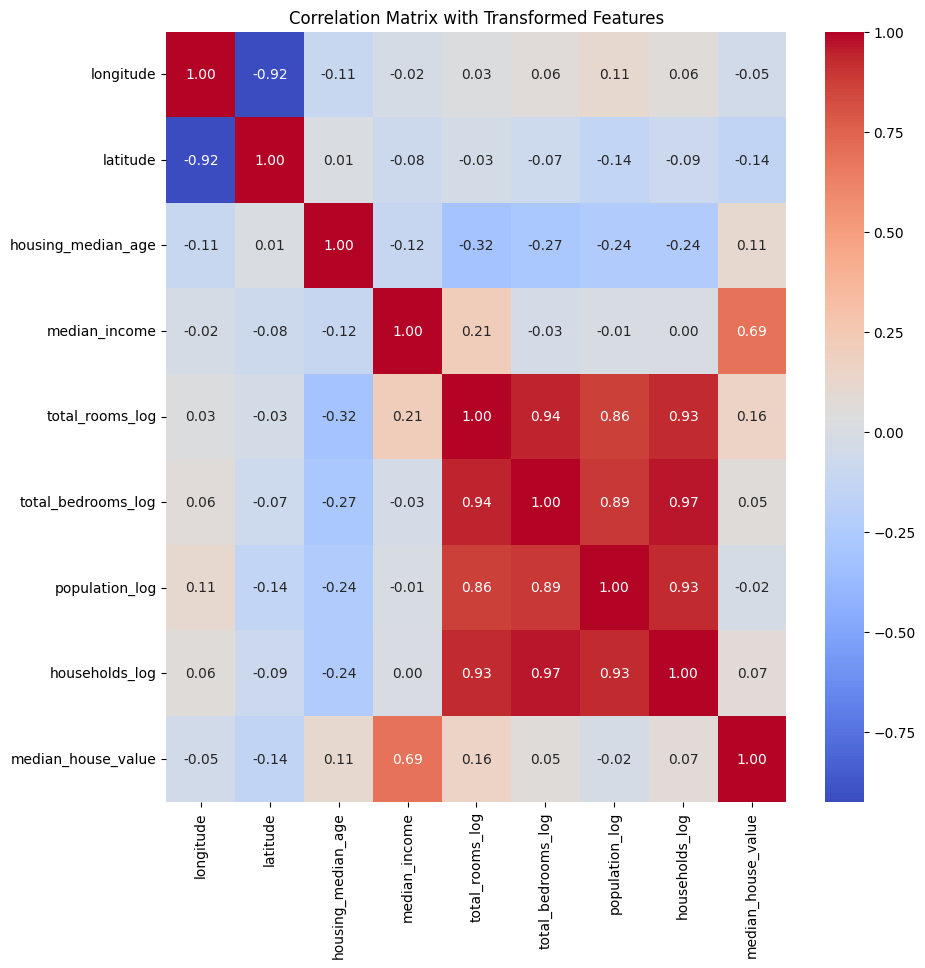

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columns to include in correlation
corr_cols = [
    'longitude', 'latitude', 'housing_median_age',
    'median_income', 'total_rooms_log',
    'total_bedrooms_log', 'population_log',
    'households_log', 'median_house_value'
]

# Compute correlation
corr_matrix = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix with Transformed Features")
plt.show()



# **3. Data Preprocessing**

In [71]:
from sklearn.model_selection import train_test_split
X = df[['median_income', 'housing_median_age',
        'total_rooms_log', 'total_bedrooms_log',
        'population_log', 'households_log',
        'latitude', 'longitude',
        'ocean_proximity_<1H OCEAN',
        'ocean_proximity_INLAND',
        'ocean_proximity_ISLAND',
        'ocean_proximity_NEAR BAY',
        'ocean_proximity_NEAR OCEAN']]
y=df["median_house_value"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [72]:
from sklearn.preprocessing import StandardScaler
standard_scaler=StandardScaler()
x_train_scaled=standard_scaler.fit_transform(x_train)
x_test_scaled=standard_scaler.transform(x_test)

# **4. Model Building**


In [73]:
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()
linear_regression.fit(x_train_scaled,y_train)
y_predict=linear_regression.predict(x_test_scaled)

In [82]:
from sklearn.metrics import mean_squared_error, r2_score
rmse_linear_regression=np.sqrt(mean_squared_error(y_test,y_predict))
r2_linear_regression=r2_score(y_test,y_predict)
print("RMSE : ",rmse_linear_regression)
print("R2 : ",r2_linear_regression)

RMSE :  69356.3243106497
R2 :  0.6329161504722448


In [83]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse_random_forest = np.sqrt(mean_squared_error(y_test, y_pred))
r2_random_forest = r2_score(y_test, y_pred)

print("RMSE:", rmse_random_forest)
print("R² Score:", r2_random_forest)

RMSE: 48960.54959502946
R² Score: 0.8170696739375773


# **5.Model Evaluation**

In [84]:
# Create a performance matrix
performance_data = {'Model': ['Linear Regression', 'Random Forest Regressor'],
                    'RMSE': [rmse_linear_regression, rmse_random_forest],
                    'R2 Score': [r2_linear_regression, r2_random_forest]}

performance_df = pd.DataFrame(performance_data)

display(performance_df)

,Model,RMSE,R2 Score
0,Linear Regression,69356.324311,0.632916
1,Random Forest Regressor,48960.549595,0.817070
